Quelle: Automate Web Scraping and Updating Database with Python, MongoDB, and GitHub Actions, Yong Hong Tan, MEDIUM: https://python.plainenglish.io/automate-web-scraping-and-updating-database-with-python-mongodb-and-github-actions-c418c674c15b

In [3]:
import pandas as pd

In [5]:
# scrape the list of S&P 500 companies
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
payload = pd.read_html(url)
symbol_list = payload[0]

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
# save to local csv file
symbol_list.to_csv('SAP500_symbol_list.csv')

In [ ]:
# import MongoClient from pymongo
from pymongo import MongoClient
# establish a client connection
MONGODB_CONNECTION_STRING = "<Your Connection String Here>"
client = MongoClient(MONGODB_CONNECTION_STRING)

In [ ]:
# to check if connection has been established
client.server_info()['ok']

In [ ]:
# convert to dictionary for uploading to MongoDB
symbol_dict = symbol_list.to_dict('records')
# point to symbolsDB collection 
db = client.symbolsDB
# emtpy symbols collection before inserting new records
db.symbols.drop()
# insert new symbols
db.symbols.insert_many(symbol_dict)

In [ ]:
symbol_list_from_DB = db.symbols.find({})
pd.DataFrame(list(symbol_list_from_DB))

Alles müsste jetzt in MongoDB sein
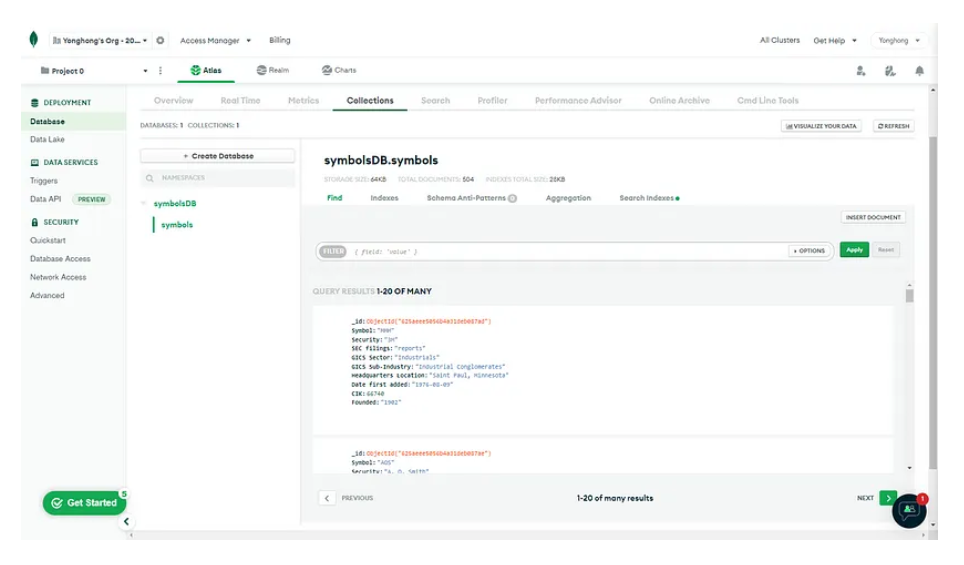